In [97]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np

In [7]:
df = pd.read_excel('../data/artificial_dataset_02052023_1643.xlsx',index_col=0)
#df = pd.read_excel('../data/G65_bounding_pp.xlsx',index_col=0)

[LightGBM] [Info] Number of positive: 73, number of negative: 253
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 326, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223926 -> initscore=-1.242930
[LightGBM] [Info] Start training from score -1.242930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='auc'>

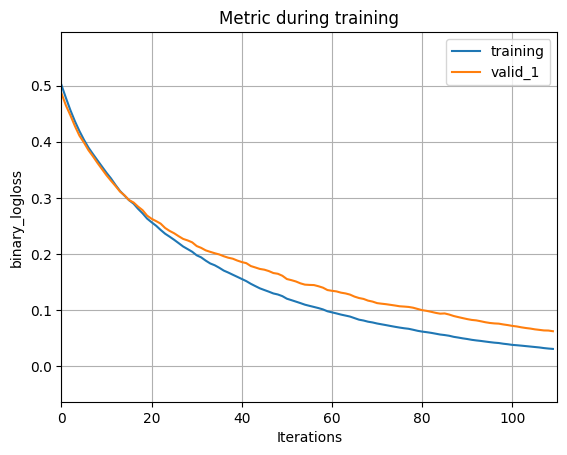

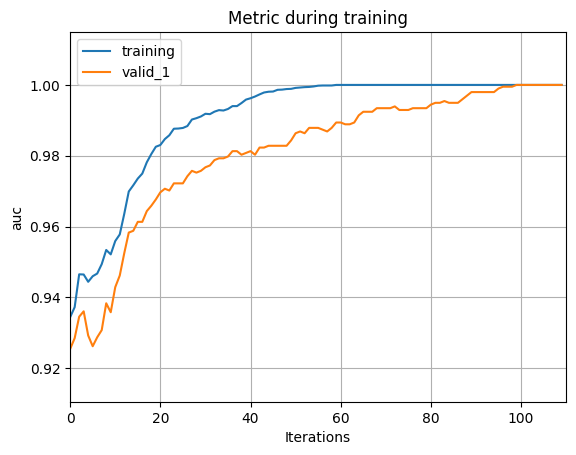

In [94]:
class_weight = {0: 1, 1: 1}

lgbm_train = lgb.Dataset(X_train, y_train, weight=y_train.map(class_weight))
lgbm_eval = lgb.Dataset(X_eval, y_eval, reference=lgbm_train)

params = {
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'num_leaves': 21,
    'learning_rate': 0.06,
    'feature_fraction': 0.9
}

evals = {}
callbacks = [lgb.early_stopping(10), lgb.record_evaluation(evals)]

gbm = lgb.train(params,
                lgbm_train,
                num_boost_round=300,
                valid_sets=[lgbm_train, lgbm_eval],
                callbacks=callbacks)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration, force_row_wise=True)
y_pred = np.round(y_pred)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\n\n Test accuracy:", accuracy)

lgb.plot_metric(evals, metric='binary_logloss')
lgb.plot_metric(evals, metric='auc')